In [29]:
import pandas as pd
import matplotlib.pyplot as plt

In [14]:
df_phone = pd.read_csv("phone_data.csv")
df_phone.head()

,index,date,duration,item,month,network,network_type
0,0,15/10/14 06:58,34.429,data,2014-11,data,data
1,1,15/10/14 06:58,13.000,call,2014-11,Vodafone,mobile
2,2,15/10/14 14:46,23.000,call,2014-11,Meteor,mobile
3,3,15/10/14 14:48,4.000,call,2014-11,Tesco,mobile
4,4,15/10/14 17:27,4.000,call,2014-11,Tesco,mobile


In [15]:
df_phone.dtypes

index             int64
date             object
duration        float64
item             object
month            object
network          object
network_type     object
dtype: object

In [16]:
import dateutil
import dateutil.parser

df_phone["date"] = df_phone["date"].apply(dateutil.parser.parse,dayfirst=True)
df_phone.dtypes

index                    int64
date            datetime64[ns]
duration               float64
item                    object
month                   object
network                 object
network_type            object
dtype: object

In [17]:
df_phone

,index,date,duration,item,month,network,network_type
0,0,2014-10-15 06:58:00,34.429,data,2014-11,data,data
1,1,2014-10-15 06:58:00,13.000,call,2014-11,Vodafone,mobile
2,2,2014-10-15 14:46:00,23.000,call,2014-11,Meteor,mobile
3,3,2014-10-15 14:48:00,4.000,call,2014-11,Tesco,mobile
4,4,2014-10-15 17:27:00,4.000,call,2014-11,Tesco,mobile
...,...,...,...,...,...,...,...
825,825,2015-03-13 00:38:00,1.000,sms,2015-03,world,world
826,826,2015-03-13 00:39:00,1.000,sms,2015-03,Vodafone,mobile
827,827,2015-03-13 06:58:00,34.429,data,2015-03,data,data
828,828,2015-03-14 00:13:00,1.000,sms,2015-03,world,world


<Axes: xlabel='month'>

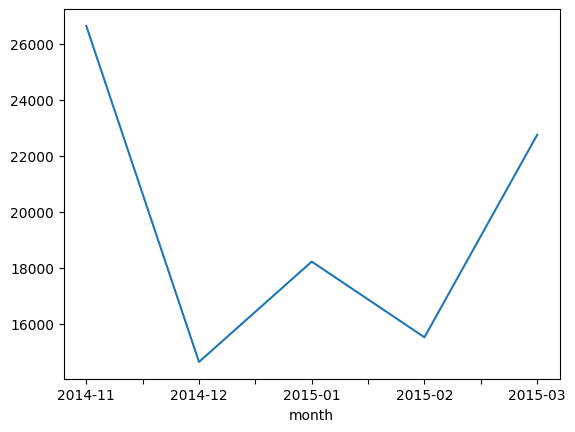

In [33]:
df_phone.groupby("month")["duration"].sum().plot()


<Axes: xlabel='month'>

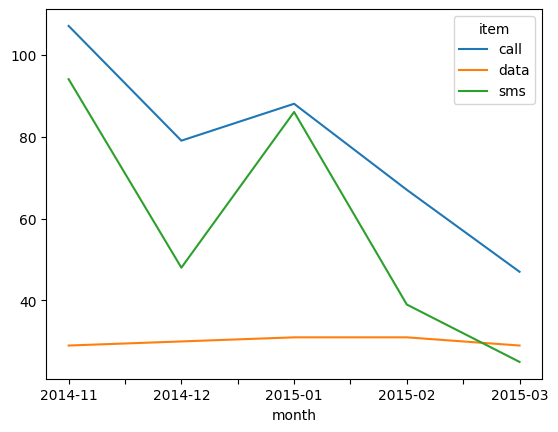

In [34]:
df_phone.groupby(["month","item"])["duration"].count().unstack().plot()

In [35]:
df_phone.groupby("month",as_index=False).agg({"duration":"sum"})

,month,duration
0,2014-11,26639.441
1,2014-12,14641.870
2,2015-01,18223.299
3,2015-02,15522.299
4,2015-03,22750.441


In [36]:
df_phone.groupby(["month","item"]).agg(
    {
        "duration":sum,
        "network_type": "count",
        "date": "first"
    }
)

C:\Users\zxxx8\AppData\Local\Temp\ipykernel_1072\899081190.py:1: FutureWarning: The provided callable <built-in function sum> is currently using SeriesGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  df_phone.groupby(["month","item"]).agg(


duration  network_type                date
month   item                                             
2014-11 call  25547.000           107 2014-10-15 06:58:00
        data    998.441            29 2014-10-15 06:58:00
        sms      94.000            94 2014-10-16 22:18:00
2014-12 call  13561.000            79 2014-11-14 17:24:00
        data   1032.870            30 2014-11-13 06:58:00
        sms      48.000            48 2014-11-14 17:28:00
2015-01 call  17070.000            88 2014-12-15 20:03:00
        data   1067.299            31 2014-12-13 06:58:00
        sms      86.000            86 2014-12-15 19:56:00
2015-02 call  14416.000            67 2015-01-15 10:36:00
        data   1067.299            31 2015-01-13 06:58:00
        sms      39.000            39 2015-01-15 12:23:00
2015-03 call  21727.000            47 2015-02-12 20:15:00
        data    998.441            29 2015-02-13 06:58:00
        sms      25.000            25 2015-02-19 18:46:00

In [37]:
#Pivot Table
df_phone.pivot_table(["duration"],
                     index=[df_phone.month,df_phone.item],
                     columns=df_phone.network,aggfunc="sum",fill_value=0)


duration                                                       \
network        Meteor   Tesco    Three Vodafone      data landline special   
month   item                                                                 
2014-11 call   1521.0  4045.0  12458.0   4316.0     0.000   2906.0     0.0   
        data      0.0     0.0      0.0      0.0   998.441      0.0     0.0   
        sms      10.0     3.0     25.0     55.0     0.000      0.0     1.0   
2014-12 call   2010.0  1819.0   6316.0   1302.0     0.000   1424.0     0.0   
        data      0.0     0.0      0.0      0.0  1032.870      0.0     0.0   
        sms      12.0     1.0     13.0     18.0     0.000      0.0     0.0   
2015-01 call   2207.0  2904.0   6445.0   3626.0     0.000   1603.0     0.0   
        data      0.0     0.0      0.0      0.0  1067.299      0.0     0.0   
        sms      10.0     3.0     33.0     40.0     0.000      0.0     0.0   
2015-02 call   1188.0  4087.0   6279.0   1864.0     0.000    730.0     0.0   
        data      0.0     0.0      0.0      0.0  1067.299      0.0     0.0   
        sms       1.0     2.0     11.0     23.0     0.000      0.0     2.0   
2015-03 call    274.0   973.0   4966.0   3513.0     0.000  11770.0     0.0   
        data      0.0     0.0      0.0      0.0   998.441      0.0     0.0   
        sms       0.0     4.0      5.0     13.0     0.000      0.0     0.0   

                              
network      voicemail world  
month   item                  
2014-11 call     301.0   0.0  
        data       0.0   0.0  
        sms        0.0   0.0  
2014-12 call     690.0   0.0  
        data       0.0   0.0  
        sms        0.0   4.0  
2015-01 call     285.0   0.0  
        data       0.0   0.0  
        sms        0.0   0.0  
2015-02 call     268.0   0.0  
        data       0.0   0.0  
        sms        0.0   0.0  
2015-03 call     231.0   0.0  
        data       0.0   0.0  
        sms        0.0   3.0